In [1]:
import tensorflow as tf

In [2]:
# apt-get install graphviz
# pip install graphviz
from tfdot import tfdot

## Basic 

In [3]:
matrix1 = tf.constant([[3., 3.]])

matrix2 = tf.constant([[2.],[2.]])

product = tf.matmul(matrix1, matrix2)

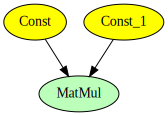

In [4]:
tfdot()

## Session

In [5]:
sess = tf.Session()
print sess.run(product)
sess.close()

[[ 12.]]


### Context manager

In [6]:
with tf.Session() as sess:
    print sess.run(product)

[[ 12.]]


### Device context 

In [7]:
with tf.Session(config=tf.ConfigProto(log_device_placement=True)) as sess:
    with tf.device("/cpu:0"):
        m1 = tf.constant([[3., 3.]])
        m2 = tf.constant([[2.],[2.]])
        pd = tf.matmul(m1, m2)
        print sess.run(pd)

[[ 12.]]


### Interactive session

In [8]:
sess = tf.InteractiveSession()

In [9]:
product.eval()

array([[ 12.]], dtype=float32)

In [10]:
pd.eval()

array([[ 12.]], dtype=float32)

## Variable

In [11]:
state = tf.Variable(0, name="counter")
one = tf.constant(1)
new_value = tf.add(state, one)
update = tf.assign(state, new_value)

init_op = tf.initialize_all_variables()

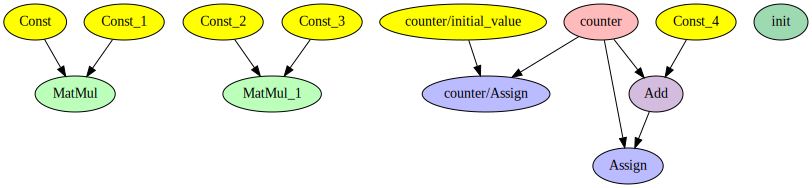

In [12]:
tfdot()

In [13]:
init_op.run()
# state.run() # variables do not run
print state.eval()

0


In [14]:
for _ in range(300):
    update.eval()

In [15]:
state.eval()

300

In [16]:
sess.run([update]*10)

[301, 301, 301, 301, 301, 301, 301, 301, 301, 301]

### Initialize from another variable

In [17]:
# will back to here later
# tf.ops.reset_default_graph()
# sess.close()
# sess = tf.InteractiveSession()

In [18]:
weights = tf.Variable(tf.random_normal([784, 200], stddev=0.35), name='weights')
w2 = tf.Variable(weights.initialized_value(), name ='w2')
w_twice = tf.Variable(weights.initialized_value()*0.2, name="w_twice")

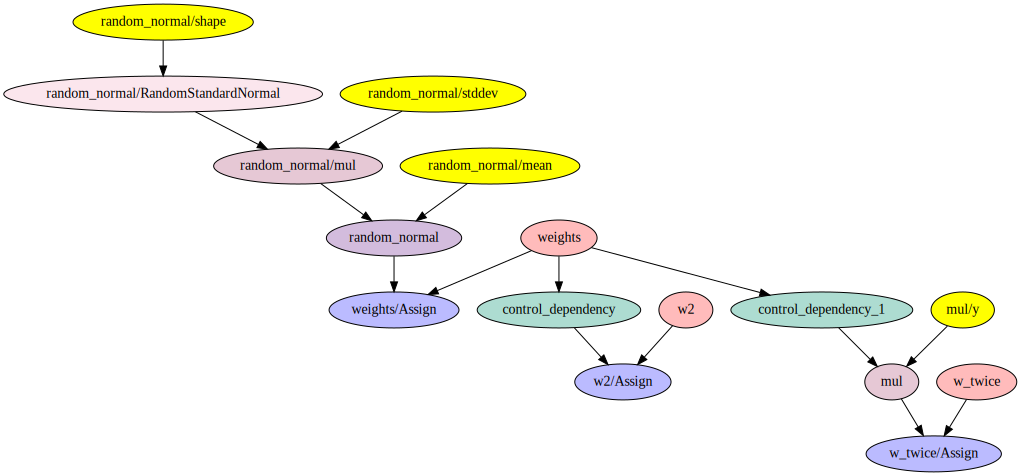

In [19]:
tfdot()

In [21]:
# init_op = tf.initialize_all_variables()
init_op.run()

In [22]:
weights.eval()

array([[-0.38269958,  0.03523663,  0.35169157, ...,  0.4903619 ,
         0.52261204, -0.18615149],
       [ 0.07982356, -0.83707672, -0.03685231, ...,  0.0845978 ,
        -0.22504218, -0.19181953],
       [ 0.00279856, -0.35753545,  0.41379452, ..., -0.02781635,
        -0.20232026, -0.05851626],
       ..., 
       [-0.06349824, -0.27584392,  0.35840699, ...,  0.23977794,
         0.76529598,  0.4582887 ],
       [ 0.5427078 ,  0.44236705,  0.10153111, ..., -0.14672053,
        -0.10476855, -0.2016985 ],
       [-0.17581804,  0.01335528, -0.57767993, ...,  0.16226387,
        -0.51003641, -0.38150811]], dtype=float32)

In [23]:
for v in tf.all_variables():
    print v.name, v

weights:0 <tensorflow.python.ops.variables.Variable object at 0x7f4a2425fd50>
w2:0 <tensorflow.python.ops.variables.Variable object at 0x7f49f8584710>
w_twice:0 <tensorflow.python.ops.variables.Variable object at 0x7f4a26819810>


## Feeds

In [24]:
input1 = tf.placeholder(tf.types.float32)
input2 = tf.placeholder(tf.types.float32)
output = tf.mul(input1, input2)
output.eval(feed_dict={input1: [9.], input2: [4.]})

array([ 36.], dtype=float32)

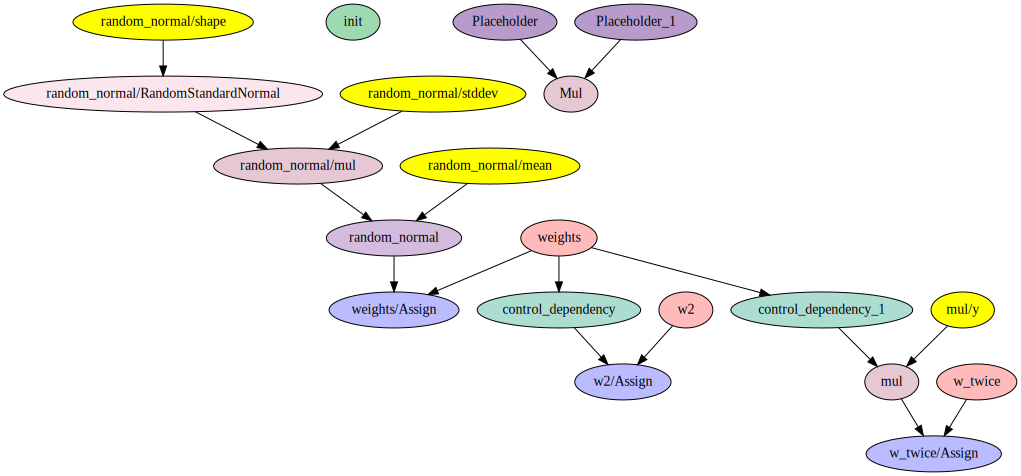

In [25]:
tfdot()